In [179]:
import tensorflow as tf
import pandas
import sklearn
from tensorflow import keras
from tensorflow.keras import Sequential, layers
from tensorflow.keras.layers import Dense,Flatten
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

In [180]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [181]:
def print_Examples(x_train, y_train):
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.imshow(x_train[i])
        plt.title("The label is " + str(y_train[i]))
        plt.axis("off")
        

In [192]:


def model(input_shape, num_classes,x_train, y_train,x_test,y_test, epochs):
    model = Sequential([ 
        layers.Rescaling(1./255, input_shape=input_shape), 
        layers.Conv2D(32, 3, padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2,2)), 
        layers.Dropout(0.25), 
        layers.Conv2D(64, 3, padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2,2)), 
        layers.Dropout(0.25), 
        layers.Flatten(), 
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5), 
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5), 
        layers.Dense(num_classes, activation="softmax") 
    ]) 
    
    model.compile(optimizer='adam', 
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
                metrics=['accuracy']) 

    # Define the early stopping criteria
    early_stopping = EarlyStopping(monitor='val_loss', patience=5)

    model.summary() 
    
    hist = model.fit(x_train,
    y_train,
    batch_size=32,
    epochs=epochs,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping])
    return model,hist


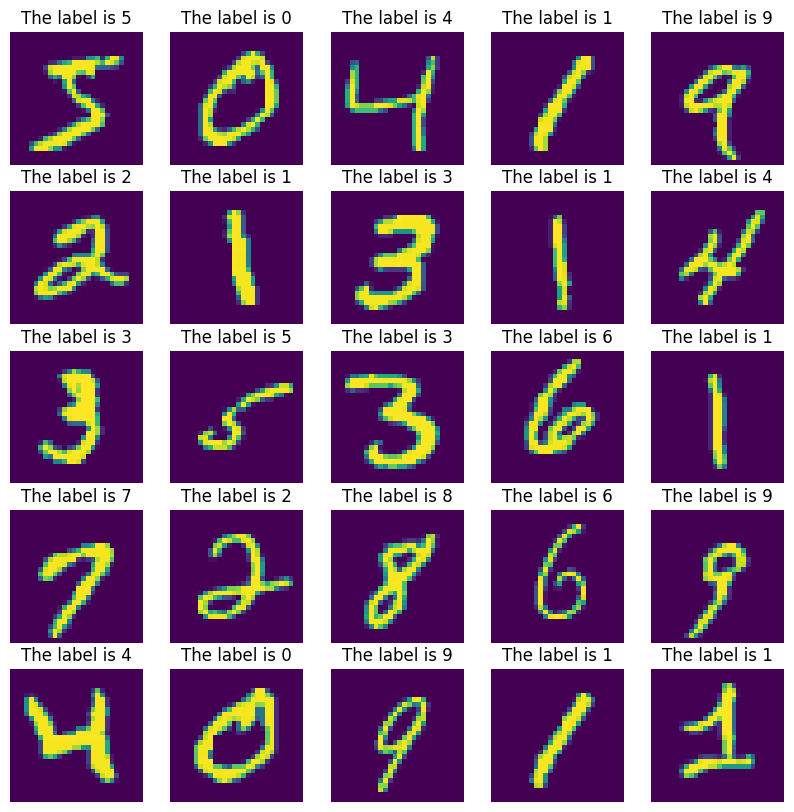

In [183]:
print_Examples(x_train, y_train)

In [193]:

epochs=30
model,hist = model((28,28,1), 10,x_train,y_train,x_test, y_test,epochs)


Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_25 (Rescaling)    (None, 28, 28, 1)         0         
                                                                 
 conv2d_64 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_33 (Ba  (None, 28, 28, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_64 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_9 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_65 (Conv2D)          (None, 14, 14, 64)      

2024-01-10 16:30:05.190043: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_25/dropout_9/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1875/1875 [==============================] - 16s 7ms/step - loss: 0.2594 - accuracy: 0.9201 - val_loss: 0.0502 - val_accuracy: 0.9822
Epoch 2/30
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1126 - accuracy: 0.9663 - val_loss: 0.0385 - val_accuracy: 0.9868
Epoch 3/30
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0871 - accuracy: 0.9734 - val_loss: 0.0323 - val_accuracy: 0.9895
Epoch 4/30
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0788 - accuracy: 0.9765 - val_loss: 0.0289 - val_accuracy: 0.9907
Epoch 5/30
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0678 - accuracy: 0.9800 - val_loss: 0.0264 - val_accuracy: 0.9909
Epoch 6/30
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0599 - accuracy: 0.9813 - val_loss: 0.0266 - val_accuracy: 0.9910
Epoch 7/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0570 - accuracy: 0.9832 - val_loss: 0.0246 - val_accuracy: 0.9

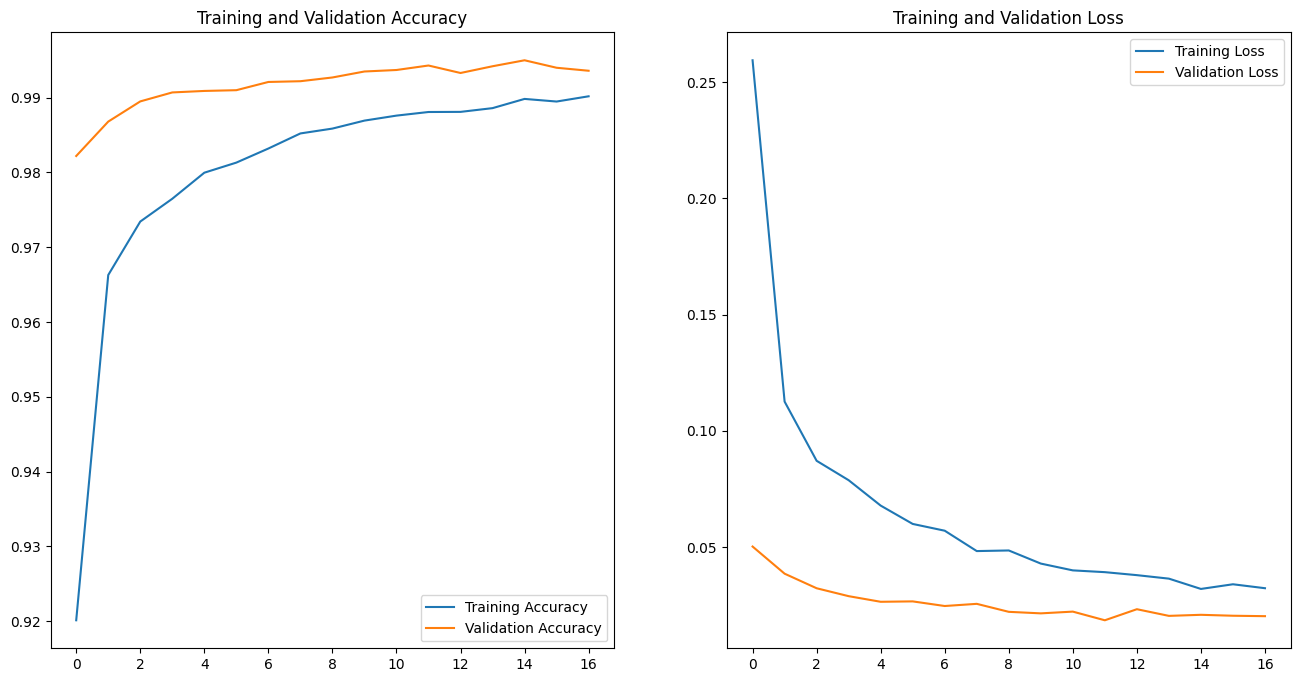

In [194]:
#Accuracy 
acc = hist.history['accuracy'] 
val_acc = hist.history['val_accuracy'] 

#loss 

loss = hist.history['loss'] 
val_loss = hist.history['val_loss'] 

#epochs 
epochs_range = range(len(acc))

#Plotting graphs 
plt.figure(figsize=(16, 8)) 
plt.subplot(1, 2, 1) 
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy') 
plt.legend(loc='lower right') 
plt.title('Training and Validation Accuracy') 

plt.subplot(1, 2, 2) 
plt.plot(epochs_range, loss, label='Training Loss') 
plt.plot(epochs_range, val_loss, label='Validation Loss') 
plt.legend(loc='upper right') 
plt.title('Training and Validation Loss') 
plt.show() 


In [195]:
results = model.evaluate(x_test, y_test, batch_size=128)
results[1]

79/79 [==============================] - 1s 9ms/step - loss: 0.0203 - accuracy: 0.9936


0.9936000108718872

In [196]:
model.save(f'model{results[1]}.h5',overwrite=False)